In [1]:
#Libraries we are using (might add more later)
import torch #Pytorch
import matplotlib as plt #Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn
import numpy as np
import pandas as pd
import math as math
import os
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split # Splits data into training/testing sets
from sklearn.preprocessing import StandardScaler #scales data for better preformance

# Electric Power Consumption 
The data set for this project can be found [here](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption).

In [2]:
df = pd.read_csv('powerconsumption.csv')
print(f'Features: {df.columns} \nShape: {df.shape}')

Features: Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object') 
Shape: (52416, 9)


In [3]:
display(df)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [4]:
# Split the date column into numbers that can be analyzed
df[['Date', 'Time']] = df['Datetime'].str.split(" ", expand=True)
df = df.drop('Datetime',axis=1)
col = df.pop('Date')
df.insert(0,'Date',col)
col = df.pop('Time')
df.insert(1,'Time',col)

In [5]:
print(df['PowerConsumption_Zone1'].min())
print(df['PowerConsumption_Zone1'].max())

13895.6962
52204.39512


#### Simple Neural Network

For a simple neural network, we will be looking at Zone 1, and estimating the power consumption while theyre rounded \

In [6]:
dfs = df.copy()

#dfs = dfs.drop(['PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1)
dfs[['Month','Day','Year']] = df['Date'].str.split("/",expand=True)
dfs[['Month', 'Day', 'Year']] = dfs[['Month', 'Day', 'Year']].astype(int)
dfs = dfs.drop(['Date'],axis=1)
dfs['Time'] = pd.to_datetime(dfs['Time'], format='%H:%M')
dfs['Time'] = dfs['Time'].dt.round('h').dt.hour
dfs = dfs.drop('Year',axis=1)
col = dfs.pop('Day')
dfs.insert(0,'Day',col)
col = dfs.pop('Month')
dfs.insert(0,'Month',col)
display(dfs)

,Month,Day,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1,1,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1,1,0,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1,1,0,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1,1,0,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1,1,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...,...
52411,12,30,23,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12,30,23,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12,30,0,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12,30,0,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [7]:
print(f'Unique Values of Time after mapping: {dfs['Time'].nunique()}')
print(f'Unique Values of Temperature : {dfs['Temperature'].nunique()}')
print(f'Unique values of Humidity: {dfs['Humidity'].nunique()}')
print(f'Unique values of Windspeed: {dfs['WindSpeed'].round(1).nunique()}')
print(f'Unique values of PowerConsumption after rounding: {dfs['PowerConsumption_Zone1'].round(2).nunique()}')

dfs['PowerConsumption_Zone1'] = (df['PowerConsumption_Zone1']/100000).round(4) * 100000
dfs['PowerConsumption_Zone1']=dfs['PowerConsumption_Zone1'].div(10)

Unique Values of Time after mapping: 24
Unique Values of Temperature : 3437
Unique values of Humidity: 4443
Unique values of Windspeed: 56
Unique values of PowerConsumption after rounding: 27669


In [8]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [9]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_size, 100)
        self.fc2 = nn.Linear(100,150)
        self.fc3 = nn.Linear(150,300)
        self.fc4 = nn.Linear(300, output_size+20)  # 20 extra for safety
        # Adding a dropout help prevent overfitting by randomly nullifying outputs from neurons during the training process
        # This helps / encourages the network to learn redundant representations for everything and increases the model to generalize.       
        self.drp = nn.Dropout(p=0,inplace=False)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.drp(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.drp(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.drp(x)
        x = self.fc4(x)
        return x



In [10]:
#The features are normalized using Standard Scaler
def trainSplit(X,y):
    scalar = StandardScaler()


    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

    X_train = scalar.fit_transform(X_train)
    X_test = scalar.transform(X_test)


    #pytorch tensors


    X_train_tensor = (torch.tensor(X_train,dtype=torch.float32)).to(device)
    X_test_tensor = (torch.tensor(X_test,dtype=torch.float32)).to(device)

    y_train_tensor = (torch.tensor(y_train,dtype=torch.long)).to(device)
    y_test_tensor = (torch.tensor(y_test,dtype=torch.long)).to(device)

    return X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor


In [11]:
def train(X,y,model,filename=None,num_epocs=None):
    if num_epocs is None:
        num_epocs = 50        

    lossF = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr=0.01)
    X_train_tensor, y_train_tensor,_,_ = trainSplit(X,y)
    for epoch in range(num_epocs):
        outputs = model(X_train_tensor)
        loss = lossF(outputs,y_train_tensor)

        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()

    #Save the model if a file name is given
    if filename is not None:
        torch.save(model,filename)
        print(f'Saved model as: {filename}')
    

In [12]:
def printResults(model,X,y,error=None):
    if error is None:
        error = 100
    else:
        error = error/10
    _,_,X_test_tensor,y_test_tensor = trainSplit(X,y)
    with torch.no_grad():  
        outputs = model(X_test_tensor)  
        _, predicted = torch.max(outputs, 1) 

        # Calculate accuracy
        correct = (abs(predicted - y_test_tensor) < error).sum().item()  
        print(f'Correct: {correct}/{y_test_tensor.size(0)}')
        accuracy = correct / y_test_tensor.size(0)  
        print(f'Accuracy on test data: {accuracy * 100:.2f}%')

        predicted = predicted.cpu()
        y_test_tensor = y_test_tensor.cpu()
        predicted_values = (predicted.numpy() + y.min()) * 10
        actual_values = (y_test_tensor.numpy() + y.min()) * 10

        data = pd.DataFrame({
            'Actual': actual_values,
            'Predicted': predicted_values
        })

        fig, ax = plt.subplots(figsize=(10, 6))  


        ax.scatter(data['Actual'], data['Predicted'], alpha=0.6, label='Data points')


        ax.plot(
            [data['Actual'].min(), data['Actual'].max()],
            [data['Actual'].min(), data['Actual'].max()],
            color='red',
            label='Ideal fit'
        )


        ax.set_title('Actual vs Predicted Values') 
        ax.set_xlabel('Actual Values')  
        ax.set_ylabel('Predicted Values')  
        ax.legend()
        ax.grid(True)

    return ax

In [13]:

def loadModel(modelName):
    model = torch.load(modelName)
    model.eval()
    return model

In [14]:
X1 = dfs[['Month','Day','Time','Temperature','Humidity','WindSpeed']].to_numpy()
y = dfs['PowerConsumption_Zone1'].to_numpy()
y = y - y.min()
inputSize = X1[0].size
outputSize = int(y.max())
#model = SimpleNeuralNetwork(inputSize,outputSize).to(device)
#train(X1,y,model,"ModelWithoutFeatures",num_epocs=150)

C:\Users\zainm\AppData\Local\Temp\ipykernel_60948\4105242607.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(modelName)


Correct: 6287/10484
Accuracy on test data: 59.97%


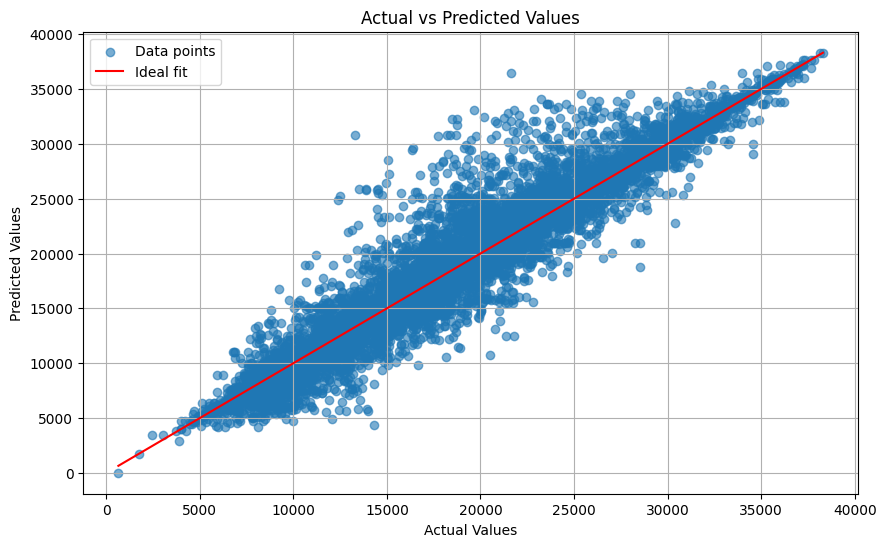

In [15]:
printResults(loadModel("ModelWithoutFeatures"),X1,y,error=1000)
plt.show()

So our data when given a margin of error of about predicts the correct output energy with a margin of error of about 3000 watts with a 72.25% accuracy 

Step 1: Feature Engineering

We can incorporate lag features so how much power was used in the prior days

In [16]:
#Unfortunately, this will cause us to lose 7 rows of data but that isnt that bad. (Due to nan values)

dfs['lag1'] = dfs['PowerConsumption_Zone1'].shift(1) #Lag 1 day behind
dfs['lag2'] = dfs['PowerConsumption_Zone1'].shift(3) #Lag 3 days behind
dfs['lag3'] = dfs['PowerConsumption_Zone1'].shift(7) #Lag approx 1 week behind
dfs['rolling_mean_7'] = dfs['PowerConsumption_Zone1'].rolling(window=7).mean()
dfs = dfs[7:]
display(dfs)

,Month,Day,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,lag1,lag2,lag3,rolling_mean_7
7,1,1,1,5.496,78.2,0.085,0.055,0.093,2545.0,16661.39818,17459.27711,2600.0,2734.0,3406.0,2751.142857
8,1,1,1,5.678,78.1,0.081,0.066,0.141,2478.0,16227.35562,17025.54217,2545.0,2662.0,2981.0,2679.285714
9,1,1,2,5.491,77.3,0.082,0.062,0.111,2428.0,15939.20973,16794.21687,2478.0,2600.0,2913.0,2610.000000
10,1,1,2,5.516,77.5,0.081,0.051,0.108,2390.0,15435.86626,16638.07229,2428.0,2545.0,2823.0,2548.142857
11,1,1,2,5.471,76.7,0.083,0.059,0.126,2354.0,15213.37386,16395.18072,2390.0,2478.0,2734.0,2493.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,12,30,23,7.010,72.4,0.080,0.040,0.096,3116.0,26857.31820,14780.31212,3216.0,3339.0,3492.0,3319.571429
52412,12,30,23,6.947,72.6,0.082,0.051,0.093,3043.0,26124.57809,14428.81152,3116.0,3282.0,3474.0,3258.000000
52413,12,30,0,6.900,72.8,0.086,0.084,0.074,2959.0,25277.69254,13806.48259,3043.0,3216.0,3432.0,3190.428571
52414,12,30,0,6.758,73.0,0.080,0.066,0.089,2896.0,24692.23688,13512.60504,2959.0,3116.0,3378.0,3121.571429


In [17]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x/period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x/period * 2 * np.pi))

In [18]:
dfs['month_sin'] = sin_transformer(12).fit_transform(dfs[['Month']])['Month']
dfs['month_cos'] = cos_transformer(12).fit_transform(dfs[['Month']])['Month']

dfs['day_sin'] = sin_transformer(30).fit_transform(dfs[['Day']])['Day']
dfs['day_cos'] = cos_transformer(30).fit_transform(dfs[['Day']])['Day']

dfs['time_sin'] = sin_transformer(24).fit_transform(dfs[['Time']])['Time']
dfs['time_cos'] = cos_transformer(24).fit_transform(dfs[['Time']])['Time']


In [19]:
display(dfs)

,Month,Day,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,...,lag1,lag2,lag3,rolling_mean_7,month_sin,month_cos,day_sin,day_cos,time_sin,time_cos
7,1,1,1,5.496,78.2,0.085,0.055,0.093,2545.0,16661.39818,...,2600.0,2734.0,3406.0,2751.142857,5.000000e-01,0.866025,2.079117e-01,0.978148,0.258819,0.965926
8,1,1,1,5.678,78.1,0.081,0.066,0.141,2478.0,16227.35562,...,2545.0,2662.0,2981.0,2679.285714,5.000000e-01,0.866025,2.079117e-01,0.978148,0.258819,0.965926
9,1,1,2,5.491,77.3,0.082,0.062,0.111,2428.0,15939.20973,...,2478.0,2600.0,2913.0,2610.000000,5.000000e-01,0.866025,2.079117e-01,0.978148,0.500000,0.866025
10,1,1,2,5.516,77.5,0.081,0.051,0.108,2390.0,15435.86626,...,2428.0,2545.0,2823.0,2548.142857,5.000000e-01,0.866025,2.079117e-01,0.978148,0.500000,0.866025
11,1,1,2,5.471,76.7,0.083,0.059,0.126,2354.0,15213.37386,...,2390.0,2478.0,2734.0,2493.857143,5.000000e-01,0.866025,2.079117e-01,0.978148,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,12,30,23,7.010,72.4,0.080,0.040,0.096,3116.0,26857.31820,...,3216.0,3339.0,3492.0,3319.571429,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.258819,0.965926
52412,12,30,23,6.947,72.6,0.082,0.051,0.093,3043.0,26124.57809,...,3116.0,3282.0,3474.0,3258.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.258819,0.965926
52413,12,30,0,6.900,72.8,0.086,0.084,0.074,2959.0,25277.69254,...,3043.0,3216.0,3432.0,3190.428571,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.000000,1.000000
52414,12,30,0,6.758,73.0,0.080,0.066,0.089,2896.0,24692.23688,...,2959.0,3116.0,3378.0,3121.571429,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.000000,1.000000


In [20]:
X2 = dfs[['month_sin','month_cos','day_sin','day_cos','time_sin','time_cos','Temperature','Humidity','WindSpeed','rolling_mean_7','lag1','lag2','lag3']].to_numpy()
y2 = dfs['PowerConsumption_Zone1'].to_numpy()
y2 = y2 - y2.min()

inputSize = X2[0].size
outputSize = int(y2.max())
#model = SimpleNeuralNetwork(inputSize,outputSize).to(device)
#train(X2,y2,model,"ModelWithFeatures",num_epocs=100)

Correct: 9546/10482
Accuracy on test data: 91.07%


C:\Users\zainm\AppData\Local\Temp\ipykernel_60948\4105242607.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(modelName)


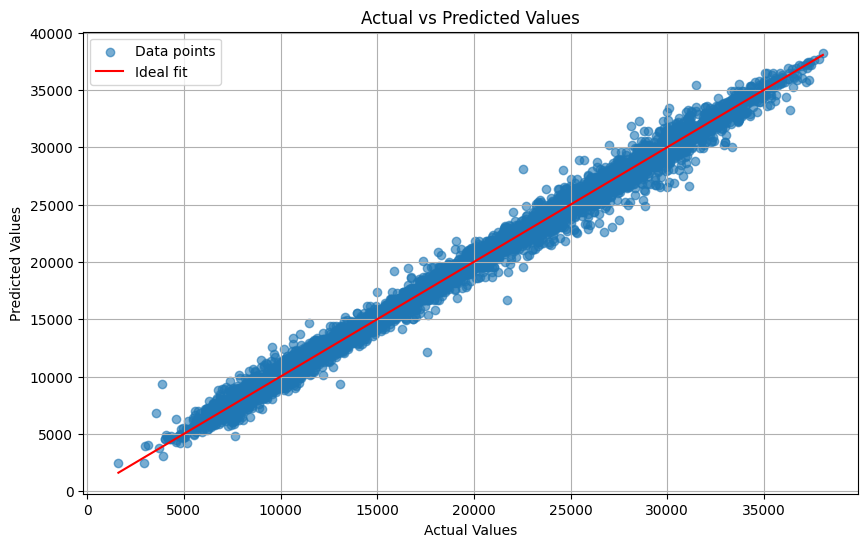

In [21]:
printResults(loadModel("ModelWithFeatures"),X2,y2,error=1000)
plt.show()